In [1]:
import numpy as np
import matplotlib.pyplot as plt
from update_utils import *
from retraction_free import *

In [2]:
N = 4
m = 1000
# number of samples ?
n = 100
# problem dim
r = 5

eig_rank = n
# rank
# max_iter = 10000

exp_num = 1
# number of experiments

In [3]:
# def ret_free_tracking(A, W, step_size, X_0, x_opt, max_iter=10000):
#     distance = []
#     N = X_0.shape[0]
#     n = X_0.shape[1]
#     r = X_0.shape[2]
    
#     lambd = 0.2
#     beta = 0.5
#     x = np.copy(X_0)
#     y = np.zeros_like(X_0)
#     grad = np.zeros_like(X_0)
#     penalty = np.zeros_like(X_0)
    
#     A_m = np.zeros((n,n))
#     for i in range(N):
#         A_m += A[i]@A[i].T
    
#     x_opt, s, v = np.linalg.svd(A_m)
#     x_opt = x_opt[:, :r]


#     for i in range(N):
#         grad[i] = A[i]@A[i].T@x[i]
#         grad[i] = proj_tangent(x[i], grad[i])
#         penalty[i] = lambd * x[i] @ (x[i].T@x[i] - np.eye(r))
#         y[i] = proj_tangent(x[i], A[i]@A[i].T@x[i])
    
#     y = np.copy(grad)
    
#     # manual first round
#     # for i in range(N):
#     #     x[i] = x[i] + proj_tangent(x[i], grad[i]) - penalty[i]
        
#     # new_x = np.zeros_like(X_0)
#     for k in range(max_iter):
#         old_grad = grad
#         old_x = x
#         old_y = y
#         old_penalty = penalty
                
#         Wx = np.zeros_like(x)
#         for i in range(N):
#             for j in range(N):
#                 # Wx[i] += W[i,j] * (old_x[j] - old_x[i])
#                 Wx[i] += W[i,j] * (old_x[j])
                
#         for i in range(N):
#             x[i] = x[i] + proj_tangent(x[i], beta*Wx[i] + step_size*y[i]) - penalty[i]
#             # x[i] = x[i] + proj_tangent(x[i], beta*Wx[i] + step_size*grad[i]) - penalty[i]
            
            
#         grad = np.zeros_like(X_0)
#         for i in range(N):
#             grad[i] = A[i]@A[i].T@x[i]
#             grad[i] = proj_tangent(x[i], grad[i])
#             penalty[i] = lambd * x[i] @ (x[i].T@x[i] - np.eye(r))
#             # print(np.linalg.norm(x[i].T@x[i] - np.eye(r)))
#         y = np.zeros_like(old_y)
#         for i in range(N):
#             for j in range(N):
#                 y[i] += W[i,j] * old_y[j]
#             y[i] += grad[i] - old_grad[i]
#         # dist = 0
#         # for i in range(N):
#         #     dist += np.linalg.norm(x_opt-x[i])
        
#         x_bar = np.average(x, axis=0)
#         u, s, v = np.linalg.svd(x_opt.T@x_bar)
#         dist = np.sqrt(2*np.abs(r - np.sum(s)))
#         distance.append(dist)
#         if dist < 1e-6 or np.isnan(dist):
#             break
#         if k%100 == 0:
#             print("iter:", k, "dist:", dist)
#             print("average x:", np.linalg.norm(np.average(x, axis=0)-x_opt))
    
#             # return np.zeros(max_iter)
#             x_bar = np.average(x, axis=0)
#             consensus_error = 0
#             for i in range(N):
#                 consensus_error += np.linalg.norm(x[i]- x_bar)
#             print("consensus error:", consensus_error)
#             print("function value:")
#             print(np.sum(np.sum(x_bar.T@A_m@x_bar)))
#             print("dist", dist)

#     print(x_bar.T@x_bar)
#     # print("average x:")
#     # print(x_bar)
#     return np.array(distance), x_bar

In [4]:

# print(x_0.shape)
# print(X_0.shape)

A = data_gen_pca(N, n, m)
B = np.zeros((m*N, n))
for i in range(N):
    B[m*i:m+m*i] = A[i].T
print(np.linalg.norm(A))
print(np.linalg.norm(B))

U, S, V = np.linalg.svd(B, full_matrices=False)
print(U.shape, S.shape, V.shape)
for i in range(n):
    if eig_rank >= i:
    # if True:
        S[i] = S[0] * 0.8**(i)
    else:
        S[i] = 0
B = U@np.diag(S)@V
print(np.linalg.norm(B))

for i in range(N):
    A[i] = B[m*i:m+m*i,:].T
    
A_m = np.zeros((n,n))
for i in range(N):
    A_m += A[i]@A[i].T
    


632.9634559317973
632.9634559317973
(4000, 100) (100,) (100, 100)
122.11819140357638


In [5]:
import scipy

scipy.io.savemat('file.mat', {'A_m': A_m})

In [6]:
print(A_m)


[[  82.93517724   22.57893031  -29.09059226 ...   -9.41579607
     9.51648615   -5.6224849 ]
 [  22.57893031  120.83619037   42.98865991 ...  -50.55017097
   -38.48626324    6.01969665]
 [ -29.09059226   42.98865991  124.96813902 ...  -95.31229895
   -61.80558502   35.57920486]
 ...
 [  -9.41579607  -50.55017097  -95.31229895 ...  152.0498807
    38.69313092 -103.02120798]
 [   9.51648615  -38.48626324  -61.80558502 ...   38.69313092
    63.76734321   16.51026649]
 [  -5.6224849     6.01969665   35.57920486 ... -103.02120798
    16.51026649  143.65510693]]


In [7]:


# print(x_0.T@x_0)

x_opt, s, v = np.linalg.svd(A_m)
# plt.plot(s)
# x_opt = x_opt[:,:r]
x_opt = x_opt[:, :r]

# print(x_opt.T@x_opt)
print(x_opt.shape)
print(x_opt[0])

print(np.sum(np.sum(x_opt.T@A_m@x_opt)))


(100, 5)
[-0.07207373 -0.0959587   0.02838878 -0.02739875  0.11559204]
13311.597308807171


In [15]:

graph_weight = 0.33
W = np.eye(N)
for i in range(N):
    W[i, i] -= 2*graph_weight
    W[i, (i-1)%N] += graph_weight
    W[i, (i+1)%N] += graph_weight
    
    
x_0 = np.random.randn(n, r)
x_0, _ = np.linalg.qr(x_0)

# x_0 = np.zeros_like(x_0)
# for i in range(r):
#     x_0[i,i] = 1

X_0 = np.repeat(x_0[np.newaxis], N, axis=0)


for i in range(N):
    x_0 = np.random.randn(n, r)
    x_0, _ = np.linalg.qr(x_0)
    X_0[i] = np.copy(x_0)
    
lin_term = np.random.randn(*X_0.shape)*10
# lin_term = None
step_size = 0.1/m
# distance, x_bar = ret_free_tracking(A, W, step_size, X_0, x_opt, max_iter=10000)
# distance = ret_free_tracking(A, W, step_size, X_0, x_opt)    

In [16]:
# plt
    # return np.array(distance), np.array(con_errors), np.array(grad_norms), x_bar
distance1, con_error1, grad_norm1, x_bar1 = ret_free_tracking(A, W, step_size, X_0, x_opt, max_iter=10000, lin_term=lin_term)
distance2, con_error2, grad_norm2, x_bar2 = ret_free_integral(A, W, step_size, X_0, x_opt, max_iter=10000, lin_term=lin_term)


100%|██████████| 10000/10000 [00:26<00:00, 377.66it/s]


[[ 1.00000003e+00  3.51879502e-09 -4.26534512e-09 -6.03977129e-09
   2.53328172e-09]
 [ 3.51879502e-09  1.00000000e+00 -2.47925974e-09  3.69567488e-09
   6.18315822e-09]
 [-4.26534512e-09 -2.47925974e-09  1.00000000e+00 -2.90428766e-09
  -5.38703581e-09]
 [-6.03977129e-09  3.69567488e-09 -2.90428766e-09  1.00000001e+00
   1.16761475e-08]
 [ 2.53328172e-09  6.18315822e-09 -5.38703581e-09  1.16761475e-08
   1.00000002e+00]]


100%|██████████| 10000/10000 [00:21<00:00, 467.64it/s]

[[ 1.00000002e+00  3.51714604e-09 -3.55599398e-09 -9.31886108e-09
   3.65985057e-09]
 [ 3.51714604e-09  9.99999998e-01 -5.14382003e-11 -1.70054324e-09
   1.76259673e-09]
 [-3.55599398e-09 -5.14382003e-11  1.00000000e+00 -4.41851745e-11
  -1.02741508e-09]
 [-9.31886108e-09 -1.70054324e-09 -4.41851745e-11  1.00000001e+00
   3.08163338e-09]
 [ 3.65985057e-09  1.76259673e-09 -1.02741508e-09  3.08163338e-09
   1.00000001e+00]]


13311.597308807171
9756.30200955894
9739.981024279072


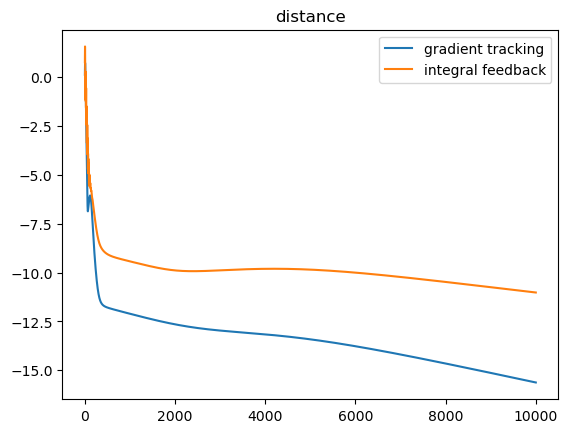

In [17]:

plt.plot(np.log(distance1), label='gradient tracking')
plt.plot(np.log(distance2), label='integral feedback')


print(np.sum(np.sum(x_opt.T@A_m@x_opt)))
print(np.sum(np.sum(x_bar1.T@A_m@x_bar1)))
print(np.sum(np.sum(x_bar2.T@A_m@x_bar2)))
plt.title("distance")
plt.legend()

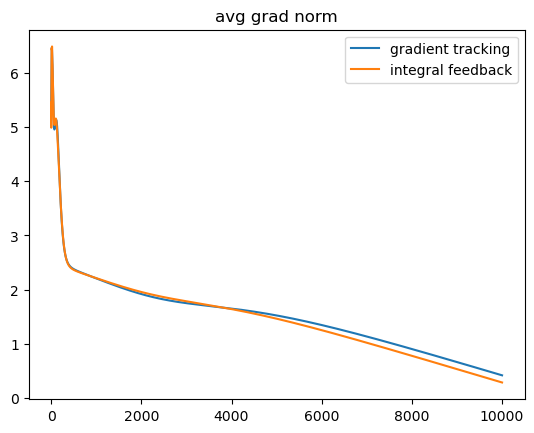

In [18]:

plt.plot(np.log(grad_norm1), label='gradient tracking')
plt.plot(np.log(grad_norm2), label='integral feedback')


plt.title("avg grad norm")
plt.legend()

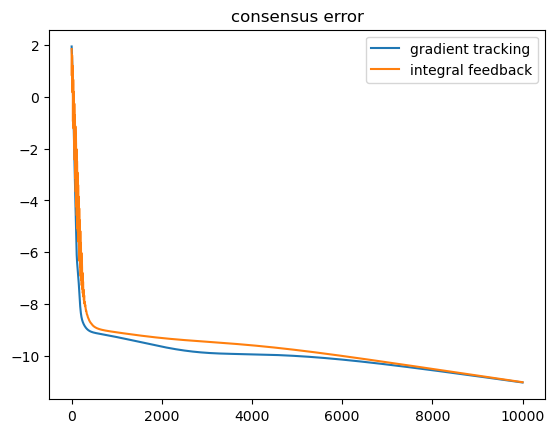

In [19]:

plt.plot(np.log(con_error1), label='gradient tracking')
plt.plot(np.log(con_error2), label='integral feedback')

plt.title("consensus error")
plt.legend()

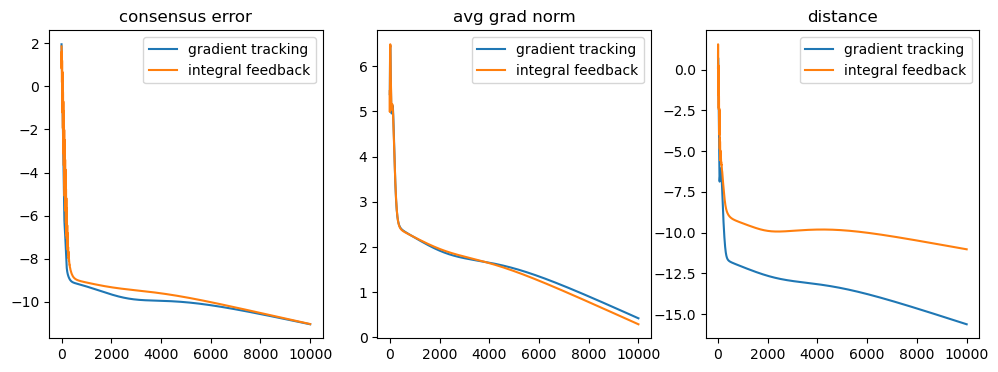

In [20]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.plot(np.log(con_error1), label='gradient tracking')
ax1.plot(np.log(con_error2), label='integral feedback')

ax1.set_title("consensus error")
ax1.legend()


ax2.plot(np.log(grad_norm1), label='gradient tracking')
ax2.plot(np.log(grad_norm2), label='integral feedback')
ax2.set_title("avg grad norm")
ax2.legend()

ax3.plot(np.log(distance1), label='gradient tracking')
ax3.plot(np.log(distance2), label='integral feedback')
ax3.set_title("distance")
ax3.legend()

# ax1.set_title('Sharing Y axis')
# ax2.scatter(x, y)

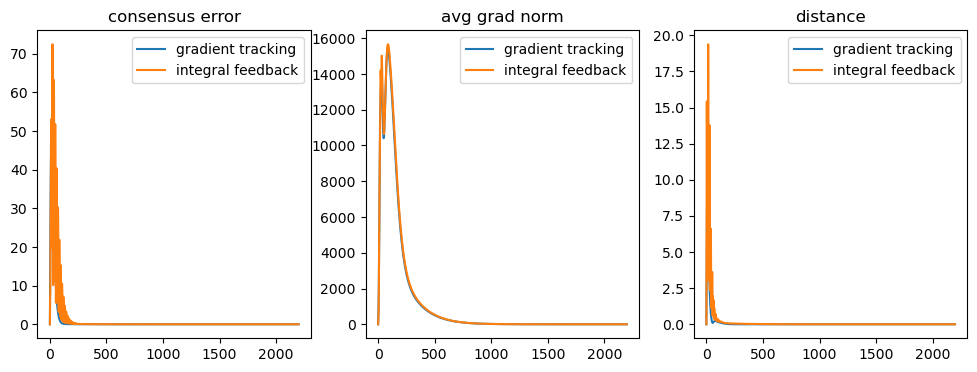

In [14]:
len = distance1.shape[0]
k_range = np.linspace(0,distance1.shape[0], distance1.shape[0])
# print(k_range.shape)
# print(distance1.shape)
# plt.plot(k_range, distance1*k_range)

# plt.plot(k_range, distance2*k_range)

# plt.ylim(0, 100)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.plot(k_range, con_error1[:len]*k_range, label='gradient tracking')
ax1.plot(k_range, (con_error2[:len])*k_range, label='integral feedback')

ax1.set_title("consensus error")
ax1.legend()


ax2.plot(k_range, (grad_norm1[:len])*k_range, label='gradient tracking')
ax2.plot(k_range, (grad_norm2[:len])*k_range, label='integral feedback')
ax2.set_title("avg grad norm")
ax2.legend()

ax3.plot(k_range, (distance1[:len])*k_range, label='gradient tracking')
ax3.plot(k_range, (distance2[:len])*k_range, label='integral feedback')
ax3.set_title("distance")
ax3.legend()